# Linear Regression

- y = a + bx + b1 x1 + b1 x2....
- y => dependent/target(1) [1D]
- x => independent/features(n) [2D]


In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [24]:
#independent
time = np.array([5,7,12,16,20]).reshape(-1,1)

In [25]:
#dependent
mass = np.array([40,120,180,210,240])

In [26]:
mymodel = LinearRegression()
#model.fit(ind,dep)
mymodel.fit(time,mass) # train the model

LinearRegression()

In [27]:
x = int(input("Enter the time in minutes: "))
result = mymodel.predict([[x]]) #passing ind var(time in 2D)
print("if the time is ",x, "minutes the mass is ",result[0], " grams")

Enter the time in minutes:  14


if the time is  14 minutes the mass is  182.41558441558442  grams


In [28]:
x = int(input("Enter the time in minutes: "))
result = mymodel.predict([[x]]) #passing ind var(time in 2D)
print("if the time is ",x, "minutes the mass is ",result[0], " grams")

Enter the time in minutes:  29


if the time is  29 minutes the mass is  365.53246753246754  grams


In [29]:
mass_model = mymodel.predict(time)
print(mass_model)

[ 72.54545455  96.96103896 158.         206.83116883 255.66233766]


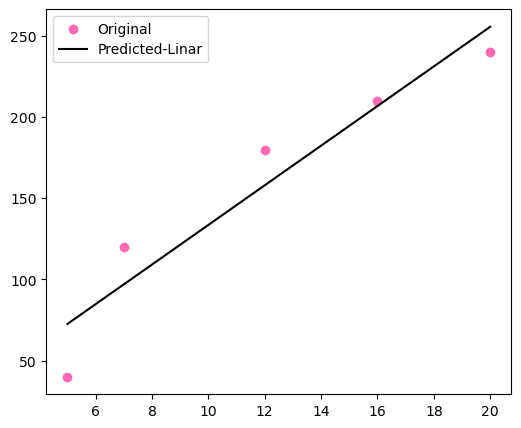

In [30]:
#plotting original values - scatter
import matplotlib.pyplot as plt
plt.figure(figsize = (6,5))
plt.scatter(time,mass,label = "Original",color = "hotpink")
#plotting model values - line
plt.plot(time,mass_model,label = "Predicted-Linar",color = "k")
plt.legend()
plt.show()

EVALUTION

R-Square
- Lager the better

In [31]:
r2score = r2_score(time,mass_model)
print(r2score)

-816.6925282509699


MSE
- Lower the better

In [32]:
mse = mean_squared_error(time,mass_model)
print(mse)

25184.929870129872


MAE
- Lower the better

In [34]:
mae = mean_absolute_error(time,mass_model)
print(mae)

146.0


# linear regression on large data

case : predicting the salary from age, experience,gender,education

1) import libraries
2) load data
3) split data
4) create and train model
5) test the model
6) evaltion

# importing libraries

In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

# loading data

In [54]:
df = pd.read_csv("C:\my files\Salary_EDA.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


clean data

In [69]:
df.isnull().sum()

Age                       2
Gender                    4
Education Level           3
Job Title                 5
Years of Experience       2
Salary                    3
Gender_encoder            0
Eduction_level_encoder    0
dtype: int64

In [71]:
df.dropna(inplace = True)
df.isnull().sum()

Age                       0
Gender                    0
Education Level           0
Job Title                 0
Years of Experience       0
Salary                    0
Gender_encoder            0
Eduction_level_encoder    0
dtype: int64

data preprocessing

In [72]:
# encding gender
gen_en = LabelEncoder()
df["Gender_encoder"]=gen_en.fit_transform(df["Gender"])
# encoding education level
edu_en = LabelEncoder()
df["Eduction_level_encoder"]=edu_en.fit_transform(df["Education Level"])

In [73]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encoder,Eduction_level_encoder
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0


split = ind,dep

In [78]:
x = df[["Age","Gender_encoder","Eduction_level_encoder","Years of Experience"]]
y = df["Salary"]

split - train and test

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
# total 700 records
#X_train- 560(age,ge,e)
#X_test- 140(age,ge,g)
#Y_train- 560(saL)
#y_test- 140(saL)

create and train

In [80]:
sal_model = LinearRegression()
sal_model.fit(x_train,y_train)

LinearRegression()

Test

In [93]:
a = float(input("Enter the age: "))
g_user = input("Enter your gender: ")
ed_user = input("Enter your education level: ")
exp = float(input("Enter your experience in years: "))

Enter the age:  39
Enter your gender:  Female
Enter your education level:  PhD
Enter your experience in years:  8


In [94]:
gen_en1 = gen_en.transform([g_user])[0]
ed_en1 = edu_en.transform([ed_user])[0]
print(gen_en1,ed_en1)

0 2


In [96]:
result = sal_model.predict([[a,gen_en1,ed_en1,exp]])
print("The predicated salary is: ",result[0])

The predicated salary is:  113372.21122018943


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


EVALUTION

1) PREDICT TEST VALUES
2) VISULAZE
3) METRICS

In [100]:
model_predictions =sal_model.predict(x_test)

In [101]:
len(y_test) # x required

74

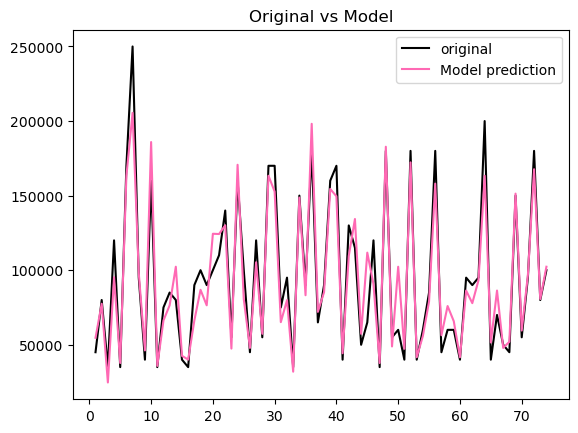

In [103]:
plt.plot(np.arange(1,75),y_test,color = "k",label = "original")
plt.plot(np.arange(1,75),model_predictions,color = "hotpink",label = "Model prediction")
plt.title("Original vs Model")
plt.legend()
plt.show()

In [ ]:
Evaltion

metrics

In [105]:
r2score = r2_score(y_test,model_predictions)
print(r2score)

0.908465830252362


In [106]:
mse = mean_squared_error(y_test,model_predictions)
print(mse)

235720545.72027326


In [109]:
mae = mean_absolute_error(y_test,model_predictions)
print(mae)

11362.212304880708
